# Proyek Analisis Data: Bike Sharing
- **Nama:** Reisya Junita Putri
- **Email:** reisyajunita@gmail.com
- **ID Dicoding:** reisyajunita

# Menentukan Pertanyaan Bisnis

1. Bagaimana perbandingan jumlah penyewaan sepeda pada workingday dan holiday?
2. Jam berapa pengguna paling banyak menggunakan rental bike sharing?
3. Bagaimana distribusi penyewaan sepeda antara 2011 dan 2012?
4. Musim apa yang penggunanya paling banyak menggunakan bike sharing?
5. Adakah hubungan antara temp, atemp, hum, dan windspeed terhadap jumlah penyewaan sepeda?

# Import Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Data Wrangling

## Gathering Data

In [2]:
# Load tabel day
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Load tabel hour
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Dataset Characteristics**

Kedua dataset yaitu day.csv dan hour.csv memiliki bidang berikut, kecuali hr (hour) yang tidak tersedia di day.csv.

- instant: index catatan
- dteday: tanggal
- season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4:musim dingin)
- yr: tahun (0:2011, 1:2012)
- mnth: bulan (1 sampai 12)
- hr: jam (0 sampai 23) "hanya ada di dataset hour.csv"
- holiday: hari cuaca hari libur atau tidak
- weekday: hari dalam seminggu (0: minggu, 6:sabtu)
- workingday: hari kerja (0: bukan hari kerja, 1: hari kerja)
+ weathersit:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: suhu yang dinormalisasi dalam Celsius. Nilai dibagi menjadi 41 (maks)
- atemp: suhu perasaan yang dinormalisasi dalam Celsius. Nilai dibagi menjadi 50 (maks)
- hum: kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
- windspeed: kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
- casual: jumlah pengguna biasa tanpa langganan
- registered: jumlah pengguna terdaftar berlangganan
- cnt: jumlah total sepeda sewaan termasuk casual dan registered

## Assessing Data

### Data day_df

In [4]:
# Menilai data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

Tidak ada masalah pada jumlah data seluruh kolom akan tetapi terdapat 2 tipe data yang akan diubah untuk mempermudah analisis data:
1. Pada kolom **dteday** yang seharusnya tipe data **datetime**, bukan **object**.
2. Pada kolom **season** kita ganti dari  **int** menjadi **category**.

In [5]:
# View duplicate data
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [6]:
# Memeriksa paramater statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

Jika diperhatikan, tidak terdapat keanehan pada parameter statistik di atas.

In [7]:
# Rename columns
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "cnt": "total"
}, inplace=True)

### Data hour_df

In [8]:
# View data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

Tidak ada masalah pada jumlah data seluruh kolom akan tetapi terdapat 2 tipe data yang akan diubah untuk mempermudah analisis data:
1. Pada kolom **dteday** yang seharusnya tipe data **datetime**, bukan **object**.
2. Pada kolom **season** kita ganti dari  **int** menjadi **category**.

In [9]:
# View duplicate data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
# Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Jika diperhatikan, tidak terdapat keanehan pada parameter statistik di atas.

In [11]:
# Rename columns
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "total"
}, inplace=True)

## Cleaning Data

### Data day_df

In [12]:
# Mengganti tipe data dteday pada tabel day_df
day_df["date"] = pd.to_datetime(day_df["date"])

# Mengganti tipe data season pada tabel day_df
day_df['season'] = day_df['season'].astype('category')
day_df['season'] = day_df['season'].cat.set_categories([1, 2, 3, 4], ordered=True)

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  total       731 non-null    int64         
dtypes: category(1), datetime64

In [13]:
# Menghapus kolom "weathersit" karena tidak diperlukan dalam analisis
day_df = day_df.drop("weathersit", axis=1)

### Data hour_df

In [14]:
# Menganti tipe data dteday pada tabel hour_df
hour_df["date"] = pd.to_datetime(hour_df["date"])

# Menganti tipe data season pada tabel hour_df
hour_df["season"] = hour_df["season"].astype("category")

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  total       17379 non-

In [15]:
# Menghapus kolom "weathersit" karena tidak diperlukan dalam analisis
hour_df = hour_df.drop("weathersit", axis=1)

# Exploratory Data Analysis

## Eksplorasi Data day_df

### Ringkasan Parameter Statistik

In [16]:
# Melihat parameter statistik
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,total
count,731.000000,731,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**

Pada rangkuman parameter statistik di atas, semua kolom memiliki 731 nilai, artinya tidak ada data yang hilang. Rata-rata total penyewaan sepeda **4504.35 sepeda per hari** dengan jumlah total penyewa sepeda memiliki standar deviasi **1937.21**, menunjukkan variasi yang besar. Dalam satu hari, jumlah minimum penyewa sepeda adalah **22** dan maksimum **8714**.

Pada kuartil pertama jumlah total penyewa sepeda **3152** sepeda, dengan median sebesar **4548** sepeda, dan kuartil ketiga sebesar **5956** sepeda. Ini menunjukkan bahwa separuh data berada antara **3152 dan 5956** penyewa sepeda per hari.

### Melihat Korelasi day_df

In [17]:
day_df.corr()

,instant,date,season,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,total
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
date,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
year,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
month,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


**Insight**

Pada table korelasi di atas, dapat dilihat bahwa jumlah total pengguna (count) **sangat berkolerasi terhadap registered (0.95)**, artinya jumlah penyewa registered lebih banyak dibandingkan casual. jumlah total pengguna (count) **cukup memiliki korelasi terhadap temp (0.63)**, artinya semakin hangat, semakin banyak orang yang menyewa sepeda. jumlah penyewa casual memiliki **korelasi negatif dengan workingday (-0.52)**, artinya pengguna casual lebih banyak menyewa pada hari libur.

Untuk holiday dengan total penyewa (count) memiliki nilai korelasi (-0.068), artinya hari libur tidak terlalu memengaruhi jumlah penyewaan sepeda. dan untuk windspeed dengan count (-0.23), artinya kecepatan angin sedikit mengurangi jumlah pengguna tapi tidak signifikan.

**Kesimpulan**

- Cuaca lebih hangat meningkatkan jumlah penyewaan sepeda.
- Hari kerja lebih banyak digunakan oleh pengguna registered, sementara pengguna casual lebih aktif di hari libur.
- Cuaca buruk dan angin kencang mengurangi jumlah penyewaan sepeda.

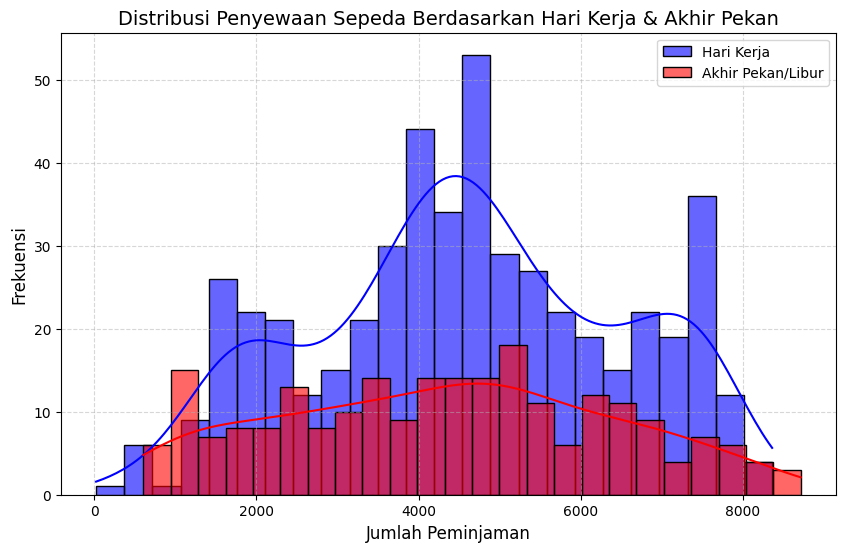

In [18]:
# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat histogram untuk hari kerja
sns.histplot(day_df[day_df["workingday"] == 1]["total"], bins=24, kde=True, color="blue", label="Hari Kerja", alpha=0.6)

# Membuat histogram untuk akhir pekan/libur
sns.histplot(day_df[day_df["workingday"] == 0]["total"], bins=24, kde=True, color="red", label="Akhir Pekan/Libur", alpha=0.6)

# Menambahkan judul dan label
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja & Akhir Pekan", fontsize=14)
plt.xlabel("Jumlah Peminjaman", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

**Insight**

Pada histogram di atas, dapat dilihat bahwa jumlah penyewaan sepeda lebih tinggi pada hari kerja dibanding akhir pekan/libur. Puncak jumlah penyewaan di hari kerja berada di sekitar 4000 - 6000 penyewa, sementara pada akhir pekan lebih merata dan tidak memiliki puncak yang jelas. 

Penyewaan sepeda tetap terjadi di akhir pekan, tetapi lebih sedikit. walaupun lebih rendah dibanding hari kerja, penyewaan akhir pekan tetap ada dalam jumlah yang signifikan.

### Pivot Table Jumlah Penyewa Casual dan Registered berdasarkan Weekday

In [19]:
# pivot table jumlah penyewa casual dan registered berdasarkan weekday
weekday_users = day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum"
})

print(weekday_users)

         casual  registered
weekday                    
0        140521      303506
1         70784      384719
2         57843      411266
3         57319      415729
4         61460      423935
5         78238      409552
6        153852      323955


**Insight:**

Berdasarkan pivot table di atas, dapat dilihat bahwa jumlah penyewa pada weekday cukup banyak, ini terjadi pada penyewa dari **registered** sebanyak 423.935 users yaitu pada hari ke-4 dan untuk hari lainnya juga cukup banyak, sedangkan untuk pada user **casual** paling banyak penyewa terjadi pada hari ke-6 dan 0 sebanyak 153.852 dan 140521. 

### Pivot Table temp, atemp, hum, dan windspeed berdasarkan Bulan (month)

In [20]:
# pivot table jumlah pelanggan casual dan registered berdasarkan month
season_users = day_df.groupby(by="month").agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean"
})

print(season_users)

           temp     atemp       hum  windspeed
month                                         
1      0.236444  0.239796  0.585828   0.206303
2      0.299226  0.299731  0.567465   0.215684
3      0.390539  0.381954  0.588475   0.222699
4      0.469999  0.457081  0.588063   0.234482
5      0.594798  0.565662  0.688958   0.182989
6      0.684097  0.638246  0.575806   0.185420
7      0.755470  0.704094  0.597876   0.166059
8      0.708582  0.651475  0.637730   0.172918
9      0.616485  0.579299  0.714714   0.165945
10     0.485012  0.471973  0.693761   0.175205
11     0.369220  0.367359  0.624876   0.183801
12     0.324031  0.326160  0.666041   0.176609


**Insight**

Berdasarkan pivot table di atas, untuk temp & atemp meningkat pada musim panas, menunjukkan suhu terendah terjadi pada bulan **Januari (0.236)** dan yang tertinggi terjadi pada **Juli-Agustus (~0.75)**. Ini sesuai dengan pola musiman, **musim panas (Juni-Agustus) lebih hangat, musim dingin (Desember-Februari) lebih dingin**.

Untuk kelembaban (hum) stabil sepanjang tahun, tidak ada perubahan yang signifikan dalam kelembaban, meskipun terlihat sedikit lebih tinggi pada bulan **Maret-Mei (~0.68-0.69)**. Artinya, kelembaban tidak terlalu terpengaruh oleh musim seperti suhu.

Untuk kecepatan angin (windspeed) lebih tinggi di awal tahun. Angin tertinggi terjadi di bulan **April (0.234)** dan cenderung menurun setelahnya. Bulan-bulan musim panas memiliki kecepatan angin yang lebih rendah (~0.16-0.18).


**Kesimpulan**
- Suhu meningkat saat musim panas dan menurun saat musim dingin, yang kemungkinan besar memengaruhi jumlah penyewaan sepeda.
- Angin cenderung lebih kencang di awal tahun dan lebih rendah selama musim panas. Ini bisa berdampak pada kenyamanan bersepeda.
- Kelembaban relatif stabil, jadi kemungkinan bukan faktor utama dalam tren penyewaan sepeda.

## Eksplorasi Data hour_df

### Ringkasan Parameter Statistik

In [21]:
# Melihat parameter statistik
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,total
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**

Pada rangkuman parameter statistik di atas, semua kolom memiliki **17379** nilai, menunjukkan bahwa tidak ada data yang hilang. Pada kolom rata-rata (mean) jam "hour" penyewaan sepeda terjadi pada **jam 11.5 atau sekitar jam 11 - 12 siang**. Nilai mediannya adalah 12, karena median ≈ mean, **distribusi data mendekati simetris**.

Pada nilai interquartile range, menunjukkan 50% tengah data berada antara **jam 6 pagi hingga jam 18 sore**. Data cenderung simetris karena mean dan mediannya hampir sama.

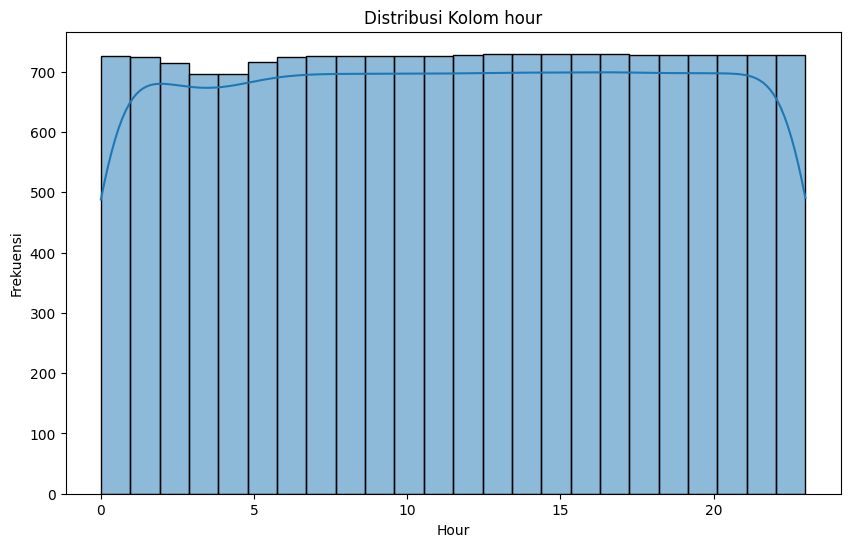

In [22]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(hour_df["hour"], bins=24, kde=True)
plt.title('Distribusi Kolom hour')
plt.xlabel('Hour')
plt.ylabel('Frekuensi')
plt.show()

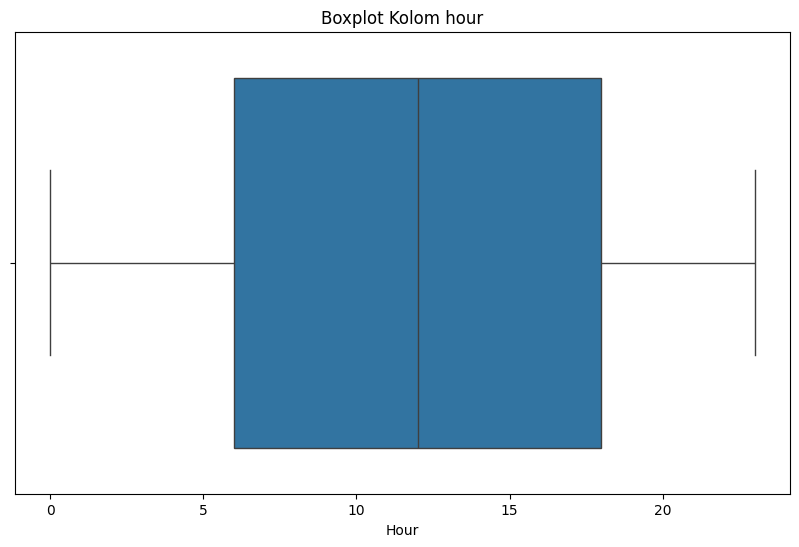

In [23]:
# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=hour_df['hour'])
plt.title('Boxplot Kolom hour')
plt.xlabel('Hour')
plt.show()

**Insight**

Pada visualisasi data di atas, histogram menunjukkan bahwa frekuensi tiap jam hampir sama, kecuali di awal (jam 0) dan akhir (jam 23) yang sedikit lebih rendah. Distribusi ini lebih menyerupai distribusi seragam (uniform distribution).

Sementara itu, pada boxplot terlihat bahwa median berada tepat di tengah box, yang menunjukkan bahwa distribusi tidak condong (skewed). Selain itu, panjang whisker yang seimbang menunjukkan bahwa sebaran data cukup simetris. Boxplot ini juga mengonfirmasi bahwa distribusi hampir seragam, sesuai dengan histogram, serta tidak terdapat outlier dalam data.

### Melihat Korelasi hour_df

In [24]:
hour_df.corr()

,instant,date,season,year,month,hour,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,total
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
date,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
month,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hour,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.136178,0.136074,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


**Insight**

Pada tabel korelasi di atas, jumlah total penyewa sepeda **(count) berkorelasi tinggi dengan registered (0.97)**, artinya pengguna registered lebih banyak dibandingkan casual. Jumlah total penyewa sepeda **(count) berkolerasi cukup tinggi dengan hour (0.39)**, artinya ada jam-jam tertentu di mana lebih banyak orang yang menyewa sepeda.

**count juga berkorelasi positif dengan temp (0.40) dan atemp (0.40)**, artinya cuaca yang lebih hangat meningkatkan jumlah penyewaan sepeda. **Count berkorelasi negatif dengan hum (-0.32) dan windspeed (-0.09)**, artinya kelembaban tinggi dan angin kencang sedikit mengurangi jumlah penyewa.

Faktor yang mempengaruhi pengguna casual, untuk **hour memiliki korelasi tinggi dengan casual (0.30)**, artinya ada jam tertentu yang lebih populer untuk pengguna casual, pada workingday memiliki korelasi negatif dengan casual (-0.30), artinya lebih banyak pengguna casual di hari libur.

Faktor yang mempengaruhi pengguna registered, untuk total penyewa sepeda (count) memiliki korelasi tinggi dengan registered (0.97), artinya sebagian besar pengguna berasal dari kategori registered. Dan untuk hour berkolerasi cukup tinggi dengan registered (0.37), artinya ada pola penggunaan tertentu sepanjang hari.

**Kesimpulan**

- Cuaca lebih hangat meningkatkan jumlah penyewaan sepeda
- Hari kerja lebih banyak digunakan oleh pengguna registered, sementara pengguna casual lebih aktif di hari libur.
- waktu (jam) berpengaruh signifikan terhadap jumlah penyewa sepeda
- Kelembaban tinggi dan angin kencang sedikit mengurangi jumlah penyewaan sepeda.

### Pivot Table Jumlah Penyewa Casual dan Registered berdasarkan Season

In [25]:
# Pivot table jumlah penyewa pada setiap season berdasarkan casual dan registered
season_users = hour_df.groupby(by="season", observed=False).agg({
    "casual": "sum",
    "registered": "sum"
}).sort_values(by=["casual", "registered"], ascending=False)

print(season_users)

        casual  registered
season                    
3       226091      835038
2       203522      715067
4       129782      711831
1        60622      410726


**Insight**

Berdasarkan pivot table di atas, musim yang paling banyak penyewaan sepeda terjadi pada musim gugur dengan casual (226.091) dan registered (835.038). 

### Pivot Table Melihat Season Mana yang Paling Banyak Penyewanya berdasarkan Temp, Atemp, Hum, dan Windspeed

In [26]:
# Pivot table melihat season mana yang paling banyak penyewanya berdasarkan temp, atemp, hum, dan windspeed
hour_df.groupby(by="season", observed=False).agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "total": "sum"
}).sort_values(by="total", ascending=False)

,temp,atemp,hum,windspeed,total
season,,,,,
3,0.706410,0.656004,0.633167,0.171593,1061129
2,0.544663,0.520547,0.627022,0.203410,918589
4,0.423138,0.415738,0.667124,0.170819,841613
1,0.299147,0.298116,0.581348,0.215107,471348


**Insight**

Berdasarkan pivot table di atas, penyewaan sepeda **tertinggi** pada **Musim Panas**,memiliki jumlah penyewaan tertinggi **(1.061.129) sepeda**. Suhu tertinggi terjadi di musim ini **(temp = 0.70, atemp = 0.65)**, cuaca yang hangat mendorong lebih banyak orang untuk menyewa sepeda.

Untuk penyewaan **menurun** pada **Musim Dingin**, memiliki jumlah penyewaan **terendah (471.348) sepeda.**, dengan suhunya juga terendah **(temp = 0.29, atemp = 0.29)**. Kecepatan angin lebih tinggi dibandingkan musim panas (0.21 vs 0.17), yang mungkin membuat bersepeda kurang nyaman.

Untuk penyewaan **menurun** pada **Musim Gugur**, meskipun suhu tidak terlalu rendah, **musim gugur** memiliki jumlah penyewaan lebih rendah dibandingkan musim semi dan panas **(841.613 sepeda)**. Hal ini disebabkan oleh cuaca yang lebih berangin dan potensi hujan lebih tinggi.

Untuk penyewaan **musim semi** memiliki penyewaan yang cukup tinggi, menunjukkan jumlah penyewaan yang cukup tinggi **(918.589) sepeda**, mendekati musim panas. Ini mungkin karena suhu mulai menghangat, tetapi belum terlalu panas sehingga masih nyaman untuk bersepeda.

**Kesimpulan**

- Suhu memainkan peran besar dalam jumlah penyewaan sepeda, artinya semakin hangat semakin banyak penyewa.
- Musim panas adalah periode puncak penyewaan sepeda, sementara musim dingin memiliki jumlah penyewaan terendah.
- Musim gugut mengalami penurunan penyewaan sepeda meskipun suhunya tidak terlalu rendah.

In [27]:
# Pivot table melihat jam yang memiliki penyewaan terbanyak
hour_df.groupby(by="hour").agg({
    "total": "sum"
}).sort_values(by="total", ascending=False)

,total
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


**Insight:**

Berdasarkan pivot table di atas, dapat dilihat pada jam 17 dan 18 adalah jam-jam di mana terjadinya penyewaan sepeda terbanyak. Selain pada sore hari, di pagi hari juga terjadi penyewaan sepeda yang cukup banyak pada jam 8. 

# Visualization & Explanatory Data Analysis

### Pertanyaan 1. Bagaimana perbandingan jumlah penyewaan sepeda pada workingday dan holiday?

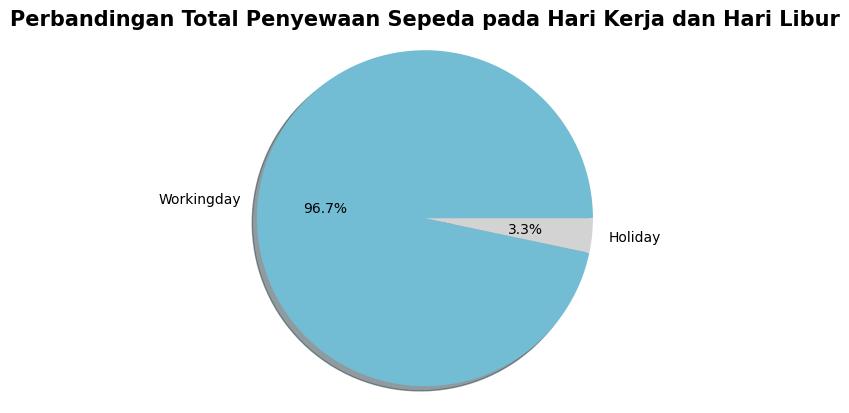

In [28]:
workingday_total = day_df[day_df["workingday"] == 1]["total"].sum()
holiday_total = day_df[day_df['holiday'] == 1]['total'].sum()

# Visualisasi Data
colors = ["#72bcd4", "#d3d3d3"]
plt.pie( [workingday_total, holiday_total], labels=["Workingday", "Holiday"],colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Perbandingan Total Penyewaan Sepeda pada Hari Kerja dan Hari Libur", fontsize=15, fontweight='bold')
plt.axis("equal")
plt.show()

**Insight**

Pada pie chart di atas, total pengguna menyewa sepeda jauh lebih tinggi pada hari kerja **(96.7%)** dibandingkan hari libur **(3.3%)**, ini menunjukkan bahwa layanan lebih sering digunakan untuk keperluan rutin seperti bekerja atau sekolah. Walaupun masih ada pengguna pada hari libur, jumlahnya jauh lebih rendah dibandingkan hari kerja, kemungkinan karena orang cenderung beristirahat atau menggunakan transportasi yang lain. 

**Tindak lanjut**
- Jika layanan ingin menarik lebih banyak pelanggan di hari libur, bisa dibuat promo atau diskon khusus.
- Jika ingin mengoptimalkan layanan pada hari kerja, bisa dilakukan penyesuaian jumlah unit yang tersedia.

### Pertanyaan 2. Jam berapa pengguna paling banyak menggunakan rental bike sharing?

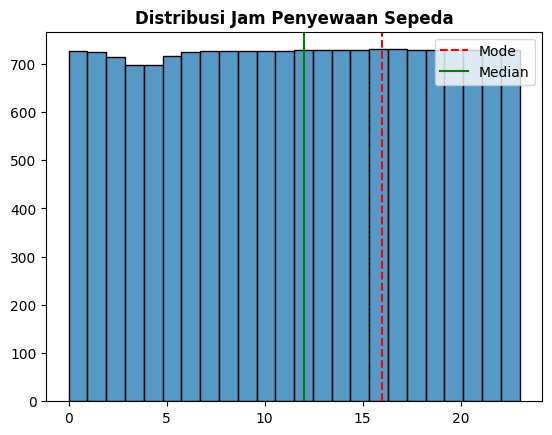

In [29]:
# Melihat Pola Waktu Pengguna Menyewa Bike Sharing
# Menghitung mode dari kolom 'hr'
mode_hour = hour_df['hour'].mode()[0]
# Menghitung median dari kolom 'hr'
median_hour = hour_df['hour'].median()

# Membuat histogram untuk visualisasi
sns.histplot(data=hour_df, x="hour", bins=24)
plt.title("Distribusi Jam Penyewaan Sepeda", fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)

# Menandai mode dan median pada histogram
plt.axvline(mode_hour, color='red', linestyle='--', label='Mode')
plt.axvline(median_hour, color='green', linestyle='-', label='Median')
plt.legend()
plt.show()

**Insight**

Berdasarkan Histogram di atas:
1. Pada garis merah putus-putus (mode) menunjukkan bahwa sekitar jam 16 atau 4 sore adalah waktu yang paling sering terjadinya penyewaan sepeda. Kemungkinan penyewa menggunakan rental ini untuk aktivitas terkait pulang kerja, sekolah, atau aktivitas lainnya yang dilakukan pada sore hari.
2. Pada garis hijau (median) menunjukkan bahwa setengah dari total penyewaan terjadi sebelum jam 12 atau siang hari dan setengahnya lagi setelahnya.

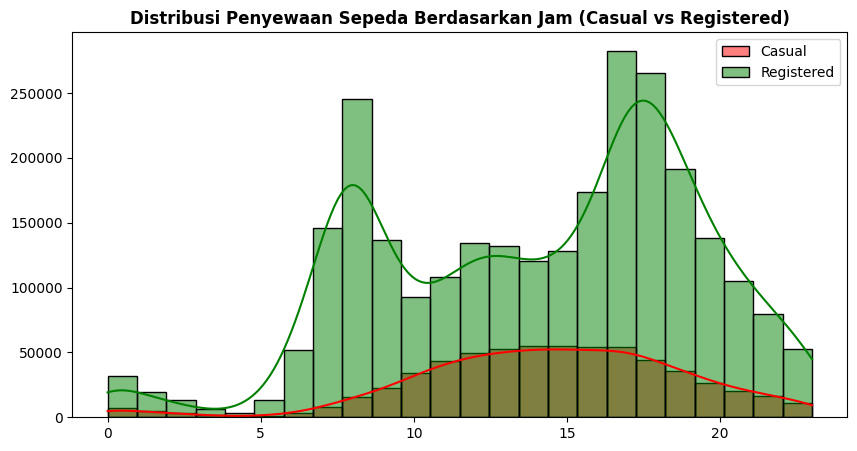

In [30]:
# Melihat Jam berapa Pengguna Casual dan Registered melakukan penyewaan
plt.figure(figsize=(10,5))

# Histogram untuk casual users
sns.histplot(hour_df, x="hour", bins=24, weights=hour_df["casual"], color="red", label="Casual", kde=True)

# Histogram untuk registered users
sns.histplot(hour_df, x="hour", bins=24, weights=hour_df["registered"], color="green", label="Registered", kde=True)

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam (Casual vs Registered)", fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

**Insight**

Pada histogram di atas, kita bisa lihat bahwa pengguna casual cenderung lebih aktif di siang dan sore hari, kemungkinan karena mereka melakukan penyewaan sepeda untuk berolahraga atau keperluan rekreasi. Pada pengguna registered, kemungkinan besar memiliki pola lebih tetap, seperti jam sibuk di pagi hari (berangkat kerja/sekolah) dan sore hari (pulang kerja/sekolah).

### Pertanyaan 3. Bagaimana distribusi penyewaan sepeda antara 2011 dan 2012?

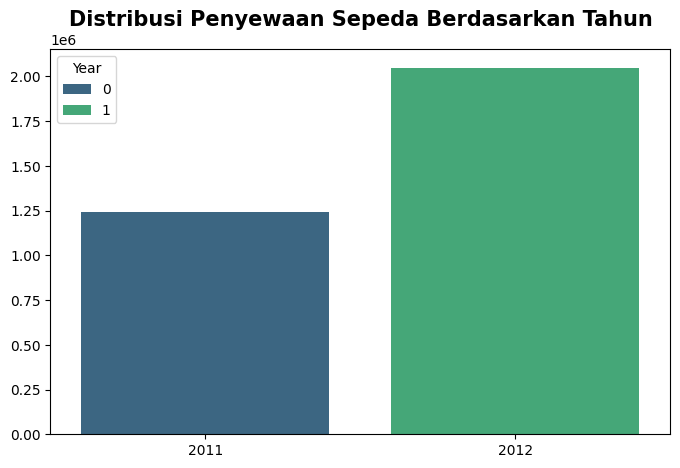

In [31]:
# Menghitung total penyewaan per tahun
yearly_counts = day_df.groupby("year")["total"].sum().reset_index()

# Membuat barplot
plt.figure(figsize=(8,5))
sns.barplot(data=yearly_counts, x="year", y="total", hue="year", palette="viridis")

# Menyesuaikan tampilan
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Tahun", fontsize=15, fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Year")
plt.xticks(ticks=[0, 1], labels=["2011", "2012"])
plt.show()

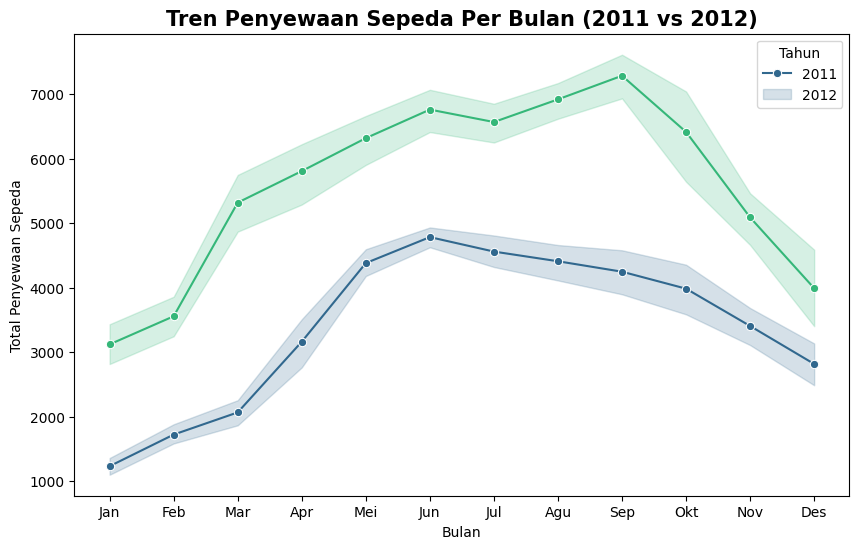

In [32]:
# Melihat pola data penyewaan sepeda per bulan di tahun 2011 dan 2012
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_df, x="month", y="total", hue="year", marker="o", palette="viridis")

# Menyesuaikan tampilan
plt.title("Tren Penyewaan Sepeda Per Bulan (2011 vs 2012)", fontsize=15, fontweight='bold')
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend(title="Tahun", labels=["2011", "2012"])
plt.show()

**Insight**

Pada line chart di atas, menunjukkan pola kenaikan dan penurunan yang serupa. Penyewaan sepeda meningkat dari **Januari hingga Agustus**, mencapai puncak di sekitar **Juli hingga Agustus**, setelah itu jumlah penyewaan mulai menurun hingga **Desember**.

Garis hijau (2012) selalu di atas garis biru (2011), menunjukkan peningkatan jumlah pengguna pada tahun 2012. ini bisa disebabkan oleh faktor seperti peningkatan jumlah pelanggan, promosi, atau cuaca yang lebih mendukung.

Variasi data cukup stabil, tetapi ada beberapa fluktuasi terutama di bulan-bulan dengan jumlah penyewaan tinggi.

### Pertanyaan 4. Musim apa yang penggunanya paling banyak menggunakan bike sharing?

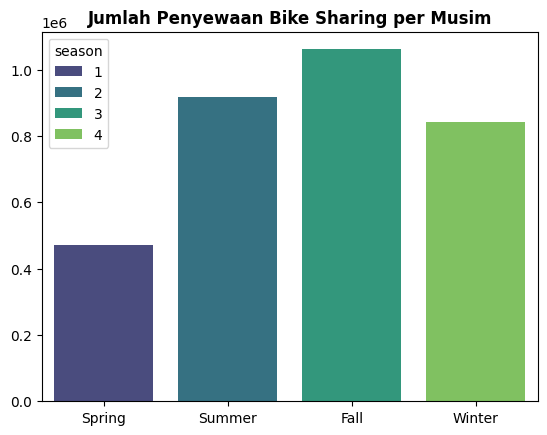

In [33]:
# Buat kategori dengan urutan yang benar
season_order = [1, 2, 3, 4]
season_labels = ["Spring", "Summer", "Fall", "Winter"]

# Buat DataFrame baru yang hanya berisi total penyewaan per musim
season_rentals = day_df.groupby('season', observed=False)['total'].sum().reset_index()

# Pastikan musim ditampilkan sesuai urutan
season_rentals['season'] = season_rentals['season'].astype('category')
season_rentals['season'] = season_rentals['season'].cat.set_categories(season_order, ordered=True)

# Visualisasi dengan seaborn
sns.barplot(data=season_rentals, x="season", y="total", hue="season", palette="viridis")
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Jumlah Penyewaan Bike Sharing per Musim", fontweight='bold')
plt.show()

**Insight**

Berdasarkan bar plot di atas, musim yang paling tinggi penyewaan sepeda terjadi pada musim gugur (Fall) dan diikuti oleh musim panas (Summer). Ini menunjukkan bahwa pengguna lebih sering menggunakan jasa bike sharing saat cuaca cenderung sejuk.

Musim dingin (Winter), merupakan musim yang memiliki jumlah penyewaan yang paling rendah. Dan untuk musim semi (Spring) mulai meningkat tetapi belum setinggi Summer/Fall.

**Kesimpulan & Tindak Lanjut**

- Musim Fall dan Summer adalah periode terbaik untuk dilakukannya promosi layanan Bike Sharing (misalnya diskon atau langganan murah).
- Winter bisa jadi tantangan, sehingga bisa dipertimbangkan strateginya, seperti:
    1. Menyediakan rute yang lebih aman atau menawarkan insentif bagi pengguna musim dingin.
    2. Menyewakan sepeda khusus untuk musim dingin (misalnya dengan ban anti selip)
- Spring bisa jadi momen untuk meningkatkan awareness agar pengguna lebih siap menghadapi peak season di Summer & Fall

# Analisis Lanjutan (Uji Korelasi Pearson)

### Pertanyaan 5. Adakah hubungan antara temp, atemp, hum, windspeed terhadap jumlah penyewaan sepeda?

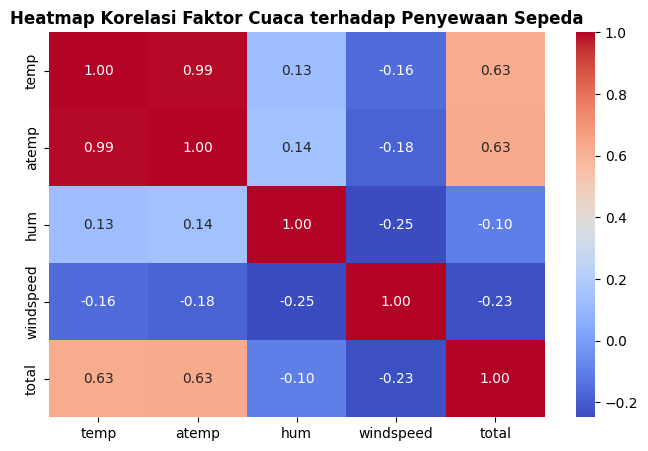

In [34]:
# Hitung korelasi
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'total']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Faktor Cuaca terhadap Penyewaan Sepeda", fontweight='bold')
plt.show()


**Insight**

1. temp dan atemp memiliki korelasi positif kuat terhadap jumlah penyewaan sepeda (+0.63). Ini menunjukkan **semakin tinggi suhu, semakin banyak sepeda yang disewa.**
2. hum memiliki korelasi negatif lemah terhadap jumlah penyewaan sepeda (-0.10), ini menunjukkan bahwa **kelembaban udara tidak terlalu berpengaruh terhadap jumlah penyewaan sepeda**, tetapi ada kecenderungan sedikit menurun saat kelembaban tinggi.
3. windspeed memiliki korelasi negatif sedang terhadap penyewaan sepeda (-0.23). Ini menunjukkan semakin tinggi kecepatan angin, semakin sedikit jumlah penyewaan sepeda, ini masuk akal karena angin yang kencang bisa membuat orang kurang nyaman untuk bersepeda.

**Kesimpulan**
- Suhu (temp & atemp) adalah faktor yang paling berpengaruh terhadap penyewaan sepeda (korelasi kuat positif).
- Kecepatan angin memiliki pengaruh sedang dan negatif, artinya angin kencang bisa mengurangi jumlah penyewaan sepeda.
- Kelembaban memiliki pengaruh yang sangat kecil terhadap penyewaan sepeda (korelasi lemah).

**Tindak Lanjut**
* Jika ingin meningkatkan jumlah penyewaan sepeda, promosi bisa lebih difokuskan pada hari-hari dengan suhu yang nyaman.
* Bisa dibuat layanan rekomendasi ke pengguna, misalnya memberikan diskon saat kecepatan angin rendah agar orang lebih tertarik menyewa sepeda.
* Untuk hari-hari dengan angin kencang, bisa ada peningkatan layanan keamanan seperti jalur sepeda yang lebih terlindungi dari angin.

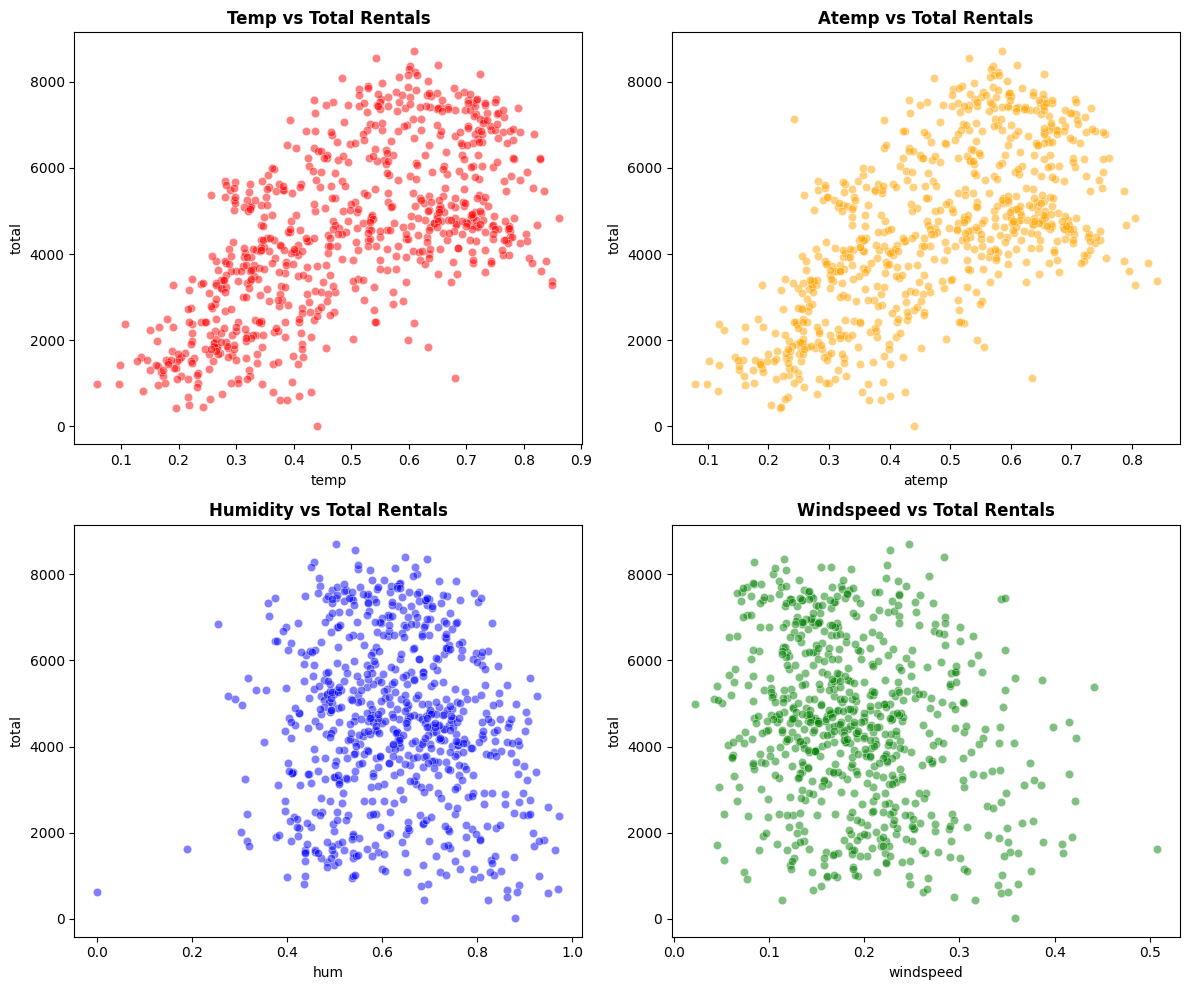

In [35]:
# Scatter plot hubungan temp, atemp, hum, windspeed dengan total rental
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Temperature vs Total Rentals
sns.scatterplot(ax=axes[0,0], data=day_df, x='temp', y='total', alpha=0.5, color="red")
axes[0,0].set_title("Temp vs Total Rentals", fontweight='bold')

# Feels-like Temperature vs Total Rentals
sns.scatterplot(ax=axes[0,1], data=day_df, x='atemp', y='total', alpha=0.5, color="orange")
axes[0,1].set_title("Atemp vs Total Rentals", fontweight='bold')

# Humidity vs Total Rentals
sns.scatterplot(ax=axes[1,0], data=day_df, x='hum', y='total', alpha=0.5, color="blue")
axes[1,0].set_title("Humidity vs Total Rentals", fontweight='bold')

# Windspeed vs Total Rentals
sns.scatterplot(ax=axes[1,1], data=day_df, x='windspeed', y='total', alpha=0.5, color="green")
axes[1,1].set_title("Windspeed vs Total Rentals", fontweight='bold')

plt.tight_layout()
plt.show()

**Insight**

Berdasarkan scatter plot di atas, Pada **temp vs total rentals** terlihat pola yang **positif linear**, artinya semakin tinggi temperatur (temp) semakin banyak jumlah penyewaan sepeda. Ini mendukung hasil korelasi sebelumnya (+0.63), orang cenderung lebih sering bersepeda saat cuaca hangat.

Untuk **atemp vs total rentals** pola ini sangat mirip dengan temp, karena atemp adalah tempratur yang dirasakan. Hubungannya juga **positif linear**, semakin tinggi atemp semakin banyak sepeda disewa.

Untuk **humidity vs total rentals** penyebaran data acak, tidak ada pola yang jelas antara hum dan total. Ini menunjukkan bahwa kelembaban (hum) **tidak memiliki pengaruh signifikan** terhadap jumlah penyewaan sepeda.

Untuk **windspeed vs total rentals** tidak ada pola linear yang kuat, namun ada sedikit kecenderungan **negatif**. Ini menunjukkan semakin tinggi windspeed, jumlah penyewaan sepeda cenderung lebih rendah tetapi hubungan ini **lemah**.

**Kesimpulan**

- Temperatur (temp & atemp) adalah faktor paling berpengaruh dalam penyewaan sepeda, sesuai dengan pola linear yang kuat.
- Kelembaban (hum) dan kecepatan angin (windspeed) tidak memiliki hubungan yang kuat terhadap jumlah penyewaan.
- Fokus utama dalam prediksi atau strategi bisnis bisa pada faktor suhu, misalnya:
    * Menawarkan diskon pada hari yang terlalu panas/dingin untuk menjaga jumlah penyewaan stabil.
    * Menyiapkan lebih banyak sepeda pada hari dengan suhu optimal (sekitar 0.4 - 0.7 dalam skala normalisasi).

In [36]:
# Uji korelasi Pearson dengan p-value
corr_temp, p_temp = pearsonr(day_df['temp'], day_df['total'])
corr_atemp, p_atemp = pearsonr(day_df['atemp'], day_df['total'])
corr_hum, p_hum = pearsonr(day_df['hum'], day_df['total'])
corr_wind, p_wind = pearsonr(day_df['windspeed'], day_df['total'])

print(f"Korelasi Temp vs Total Rentals: {corr_temp:.2f} (p-value: {p_temp:.3f})")
print(f"Korelasi Atemp vs Total Rentals: {corr_atemp:.2f} (p-value: {p_atemp:.3f})")
print(f"Korelasi Hum vs Total Rentals: {corr_hum:.2f} (p-value: {p_hum:.3f})")
print(f"Korelasi Windspeed vs Total Rentals: {corr_wind:.2f} (p-value: {p_wind:.3f})")

Korelasi Temp vs Total Rentals: 0.63 (p-value: 0.000)
Korelasi Atemp vs Total Rentals: 0.63 (p-value: 0.000)
Korelasi Hum vs Total Rentals: -0.10 (p-value: 0.006)
Korelasi Windspeed vs Total Rentals: -0.23 (p-value: 0.000)


**Insight**

Hasil analisis korelasi menunjukkan bahwa suhu memiliki pengaruh yang cukup kuat terhadap jumlah penyewaan sepeda. Baik suhu (temp) maupun suhu yang terasa (atemp) memiliki korelasi positif sebesar 0.63, yang berarti semakin hangat cuaca semakin banyak pengguna yang menyewa sepeda. Hal ini dapat dijelaskan karena cuaca yang lebih hangat cenderung lebih nyaman untuk bersepeda.

Sebaliknya, faktor kelembaban (Hum) dan kecepatan angin (Windspeed) justru menunjukkan korelasi negatif terhadap jumlah penyewaan. Kelembaban memiliki korelasi sebesar -0.10, yang berarti semakin tinggi kelembaban udara, semakin sedikit orang yang menyewa sepeda, meskipun efeknya relatif kecil. Sementara itu, kecepatan angin memiliki korelasi sebesar -0.23, yang menunjukkan bahwa angin kencang dapat mengurangi minat pengguna dalam menyewa sepeda, kemungkinan karena kesulitan dalam mengayuh atau kondisi cuaca yang kurang mendukung.

Secara keseluruhan, hasil ini mengindikasikan bahwa kondisi cuaca berperan penting dalam menentukan jumlah penyewaan sepeda. Suhu yang lebih tinggi meningkatkan jumlah penyewaan, sementara kelembaban dan angin kencang cenderung sedikit menurunkannya. Insight ini dapat digunakan untuk merancang strategi promosi atau operasional, misalnya dengan meningkatkan ketersediaan sepeda di musim yang lebih hangat atau memberikan insentif bagi pengguna saat kondisi angin dan kelembaban tidak ideal.

# Conclusions

Berdasarkan analisis yang telah dilakukan, terdapat beberapa temuan utama mengenai tren penyewaan sepeda. Jumlah penyewaan sepeda secara signifikan **lebih tinggi pada hari kerja dibanding hari libur**, menunjukkan bahwa layanan ini lebih banyak digunakan untuk aktivitas rutin seperti bekerja dan sekolah. Selain itu, jam sibuk penyewaan sepeda terjadi pada sore hari, kemungkinan besar bertepatan dengan jam pulang kerja dan sekolah.

Dari segi tahunan, terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012, yang menunjukkan adanya pertumbuhan pengguna, baik karena faktor promosi, cuaca, maupun peningkatan kesadaran masyarakat terhadap layanan ini. Musim juga berperan penting dalam tren penyewaan, di mana musim gugur dan musim panas menjadi periode dengan jumlah penyewaan tertinggi, sedangkan musim dingin memiliki tingkat penyewaan yang paling rendah.

Analisis lebih lanjut menunjukkan bahwa faktor cuaca memiliki pengaruh terhadap jumlah penyewaan sepeda. Suhu merupakan faktor yang paling berpengaruh secara positif, artinya semakin tinggi suhu semakin banyak sepeda yang disewa. Sebaliknya, kecepatan angin dan kelembaban memiliki pengaruh negatif, meskipun tidak terlalu kuat, yang menunjukkan bahwa kondisi cuaca ekstrem seperti angin kencang dapat mengurangi minat penyewaan.

**Rekomendasi Tindak Lanjut:**
- Mengoptimalkan layanan pada hari kerja dengan menyediakan lebih banyak unit sepeda.
- Meningkatkan strategi promosi untuk menarik lebih banyak pelanggan di hari libur.
- Menggunakan strategi penyesuaian stok sepeda sesuai dengan pola jam sibuk penyewaan.
- Mengadakan promosi musiman pada musim gugur dan musim panas untuk meningkatkan jumlah pelanggan.
- Menyediakan solusi bagi pengguna di musim dingin, seperti rute yang lebih aman atau sepeda dengan fitur khusus untuk cuaca dingin.
- Memanfaatkan data cuaca untuk memberikan rekomendasi atau penawaran spesial kepada pelanggan, seperti diskon pada hari-hari dengan cuaca yang optimal untuk bersepeda.

Secara keseluruhan, wawasan ini dapat digunakan untuk mengembangkan strategi bisnis yang lebih efektif, meningkatkan kepuasan pengguna, serta mengoptimalkan operasional layanan bike-sharing agar lebih sesuai dengan kebutuhan pelanggan.